## Лабораторная работа по курсу "Искусственный интеллект"

## Многослойный персептрон
|Студент| Бердикин Тимофей |
|:-----:|:-:|
|Группа|М8О-307Б-18|
|Вариант| 1 |
|Фреймворк| PyTorch |


In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

Функции для анализа датасетов

In [2]:
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Кол-во элементов в датасете : {}".format(len(labels)))
    print("Кол-во атрибутов в элементе : {}".format(len(features[0])))
    print("Мин. значение атрибута   : {}".format(np.min(features)))
    print("Макс. значение атрибута  : {}".format(np.max(features)))
    print()

### Готовим датасеты

#### MNIST

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

Данные для [MNIST]
Кол-во элементов в датасете : 42000
Кол-во атрибутов в элементе : 784
Мин. значение атрибута   : 0
Макс. значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Кол-во элементов в датасете : 33600
Кол-во атрибутов в элементе : 784
Мин. значение атрибута   : 0.0
Макс. значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Кол-во элементов в датасете : 8400
Кол-во атрибутов в элементе : 784
Мин. значение атрибута   : 0.0
Макс. значение атрибута  : 1.0



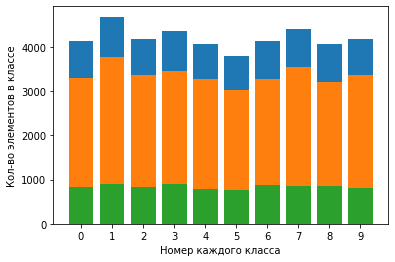

In [4]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

#### FashionMNIST

In [7]:
%cd ~/Desktop/ai_lev/fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y=mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y  =mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

/home/tim/Desktop/ai_lev/fashion-mnist/utils
/home/tim/Desktop/ai_lev/fashion-mnist
/home/tim/Desktop/ai_lev


Данные для [Обучающая выборка из Fashion MNIST]
Кол-во элементов в датасете : 60000
Кол-во атрибутов в элементе : 784
Мин. значение атрибута   : 0
Макс. значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Кол-во элементов в датасете : 10000
Кол-во атрибутов в элементе : 784
Мин. значение атрибута   : 0
Макс. значение атрибута  : 255



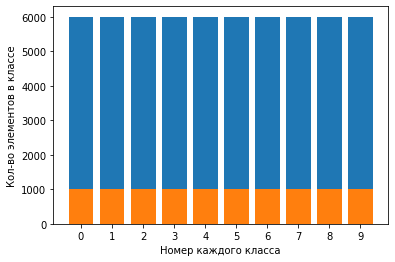

In [8]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

In [9]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

#### CIFAR-10

In [12]:
def unpickle_cifar(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
test_batch = unpickle_cifar('cifar-10-batches-py/test_batch')
data_batch_1 = unpickle_cifar('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle_cifar('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle_cifar('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle_cifar('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle_cifar('cifar-10-batches-py/data_batch_5')

In [13]:
print(test_batch.keys())
print(data_batch_1.keys())
print(test_batch[b'labels'])
print(test_batch[b'data'])
print(test_batch[b'data'][0])
print(len(test_batch[b'data'][0]))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2,

In [14]:
print("Кол-во элементов в test_batch   : {}".format(len(test_batch[b'labels'])))
print("Кол-во элементов в data_batch_1 : {}".format(len(data_batch_1[b'labels'])))
print("Кол-во элементов в data_batch_2 : {}".format(len(data_batch_2[b'labels'])))
print("Кол-во элементов в data_batch_3 : {}".format(len(data_batch_3[b'labels'])))
print("Кол-во элементов в data_batch_4 : {}".format(len(data_batch_4[b'labels'])))
print("Кол-во элементов в data_batch_5 : {}".format(len(data_batch_5[b'labels'])))

Кол-во элементов в test_batch   : 10000
Кол-во элементов в data_batch_1 : 10000
Кол-во элементов в data_batch_2 : 10000
Кол-во элементов в data_batch_3 : 10000
Кол-во элементов в data_batch_4 : 10000
Кол-во элементов в data_batch_5 : 10000


In [15]:
def append_list_to_list(list1, list2):
    for value in list2:
        list1.append(value)

cifar_train_x_raw = []
cifar_train_y     = []

append_list_to_list(cifar_train_x_raw, data_batch_1[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_2[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_3[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_4[b'data'])
append_list_to_list(cifar_train_x_raw, data_batch_5[b'data'])

append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])
append_list_to_list(cifar_train_y, data_batch_5[b'labels'])

cifar_test_x_raw = test_batch[b'data']
cifar_test_y     = test_batch[b'labels']

Данные для [Обчающая выборка CIFAR-10]
Кол-во элементов в датасете : 50000
Кол-во атрибутов в элементе : 3072
Мин. значение атрибута   : 0
Макс. значение атрибута  : 255

Данные для [Тестировочная выборка CIFAR-10]
Кол-во элементов в датасете : 10000
Кол-во атрибутов в элементе : 3072
Мин. значение атрибута   : 0
Макс. значение атрибута  : 255



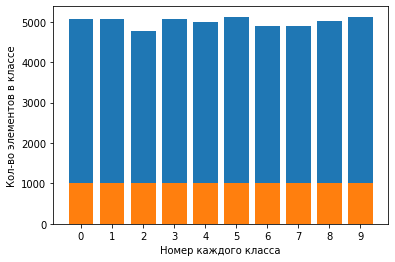

In [16]:
analyze(cifar_train_y, cifar_train_x_raw, "Обчающая выборка CIFAR-10")
analyze(cifar_test_y, cifar_test_x_raw, "Тестировочная выборка CIFAR-10")

Данные для [Тестовая выборка CIFAR-10]
Кол-во элементов в датасете : 10000
Кол-во атрибутов в элементе : 1024
Мин. значение атрибута   : 0.0
Макс. значение атрибута  : 1.0

Размер тестовой выборки  : 10000
Размер обучающей выборки : 50000
Размер датасета CIFAR-10 : 60000


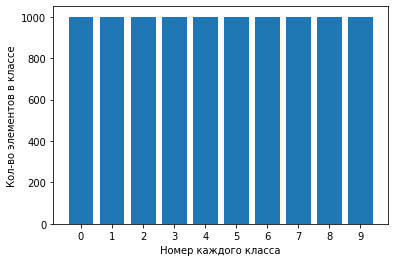

In [17]:
def conv_cifar(X):
    df = np.array(X).astype(np.float32)
    result = np.zeros(len(df) * len(df[0])//3, dtype=np.float32)
    i = 0
    for v in df:
        #print(v)
        #print(len(v))
        for j in range(0, len(v), 3):
            #print(j)
            result[i] = (v[j] + v[j+1] + v[j+2])/765
            i += 1
    return np.reshape(result ,(len(df), len(df[0])//3))


cifar_test_x  = conv_cifar(cifar_test_x_raw)
cifar_train_x = conv_cifar(cifar_train_x_raw)
analyze(cifar_test_y,cifar_test_x,"Тестовая выборка CIFAR-10")
print('Размер тестовой выборки  : {}'.format(len(cifar_test_x)))
print('Размер обучающей выборки : {}'.format(len(cifar_train_x)))
print('Размер датасета CIFAR-10 : {}'.format(len(cifar_test_x) + len(cifar_train_x)))

### Персептрон на фреймворке PyTorch

In [18]:
class PyTorchPerceptron(torch.nn.Module):
    def __init__(self, layers=[10], func=torch.nn.Sigmoid(), 
                 loss_func=torch.nn.functional.binary_cross_entropy_with_logits, 
                 epochs=10,show_status=False, learning_rate=0.05):
        super().__init__()
        self.layers=layers
        self.func=func
        self.epochs=epochs
        self.show_status=show_status
        self.learning_rate=learning_rate
        self.level=0
        self.loss_function=loss_func
        
    def fit(self, X, Y):
        self.create_net(X,Y)
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
        
        self.train(X,Y)
        return self
    
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
        
    def create_net(self, X,Y):
        self.level=0
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        module_layers = []
        
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
        
        for i in range(len(layers_settings)-2):
            module_layers.append(torch.nn.Linear(layers_settings[i], layers_settings[i+1]))
            module_layers.append(self.func)
            
        module_layers.append(torch.nn.Linear(layers_settings[-2], layers_settings[-1]))
        #module_layers.append(torch.nn.Softmax)
        self.net = torch.nn.Sequential(*module_layers)
        return self    

    def train(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        val_y = []
        for y in Y:
            val = np.zeros(self.classes_count)
            for i in range(10):
                val[i] = 1 if i == y else 0
            val_y.append(val.copy().astype(np.float32))
        dataset = torch.utils.data.TensorDataset(val_x,torch.tensor(val_y,dtype=torch.float32))
        dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)
        optim = torch.optim.Adam(self.net.parameters(),lr=self.learning_rate)
        for epoch in range(1, self.epochs+1):
            for (x,y) in dataloader:
                z = self.net(x)
                loss = self.loss_function(z,y)
                optim.zero_grad()
                loss.backward()
                optim.step()
            acc = self.score(X,Y)
            if self.show_status:
                self.status_print("[epochs {} in {}] loss : {}, accuracy : {}".format(epoch, self.epochs,loss,acc))
                
    def score(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        total_success = 0
        for res, y in zip(results, Y):
            if res == y:
                total_success += 1
        acc = total_success / len(Y)
        return acc
    def confusion_matrix(self, X, Y):
        val_x = torch.tensor(np.array(X).astype(np.float32))
        answer = self.net(val_x)
        results = [ np.argmax(v.detach().numpy()) for v in self.func(answer)]
        matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
        for res, y in zip(results, Y):
            matrix[res][y] += 1
        return matrix
        

## Тестирование MNIST
## Однослойные персептроны

Сначала возьмём функцию активации Sigmoid, кол-во внутренних слоев: 0

In [20]:
first_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[])
first_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 10] loss : 0.17170511186122894, accuracy : 0.8795238095238095
  [epochs 2 in 10] loss : 0.2239353358745575, accuracy : 0.8885119047619048
  [epochs 3 in 10] loss : 0.1990579515695572, accuracy : 0.8988095238095238
  [epochs 4 in 10] loss : 0.283875435590744, accuracy : 0.8944047619047619
  [epochs 5 in 10] loss : 0.30625540018081665, accuracy : 0.8998809523809523
  [epochs 6 in 10] loss : 0.18032333254814148, accuracy : 0.9003869047619047
  [epochs 7 in 10] loss : 0.2552279531955719, accuracy : 0.9007440476190476
  [epochs 8 in 10] loss : 0.3135366439819336, accuracy : 0.9023511904761905
  [epochs 9 in 10] loss : 0.18056567013263702, accuracy : 0.9063392857142857
  [epochs 10 in 10] loss : 0.2632879912853241, accuracy : 0.9059226190476191
Точность сети : 0.8844047619047619


Теперь берём функцию активации ReLU, количество внутренних слоев снова 0

In [22]:
second_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.ReLU())
second_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 10] loss : 0.12866152822971344, accuracy : 0.8301190476190476
  [epochs 2 in 10] loss : 0.24102525413036346, accuracy : 0.8341071428571428
  [epochs 3 in 10] loss : 0.2727263569831848, accuracy : 0.8383333333333334
  [epochs 4 in 10] loss : 0.29467520117759705, accuracy : 0.8324702380952381
  [epochs 5 in 10] loss : 0.20955631136894226, accuracy : 0.8452678571428571
  [epochs 6 in 10] loss : 0.32948392629623413, accuracy : 0.8454464285714286
  [epochs 7 in 10] loss : 0.26337119936943054, accuracy : 0.8566369047619048
  [epochs 8 in 10] loss : 0.2981107532978058, accuracy : 0.8558630952380952
  [epochs 9 in 10] loss : 0.2557260990142822, accuracy : 0.8539583333333334
  [epochs 10 in 10] loss : 0.1730637401342392, accuracy : 0.868452380952381
Точность сети : 0.8489285714285715


А теперь возьмём функцию активации Tanh, количество внутренних слоев по-прежнему 0

In [23]:
third_null_layered_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh())
third_null_layered_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_null_layered_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 10] loss : 0.15152916312217712, accuracy : 0.8835119047619048
  [epochs 2 in 10] loss : 0.2109663039445877, accuracy : 0.8901488095238095
  [epochs 3 in 10] loss : 0.21728532016277313, accuracy : 0.895922619047619
  [epochs 4 in 10] loss : 0.25202545523643494, accuracy : 0.8912797619047619
  [epochs 5 in 10] loss : 0.323904424905777, accuracy : 0.8919047619047619
  [epochs 6 in 10] loss : 0.28189414739608765, accuracy : 0.898154761904762
  [epochs 7 in 10] loss : 0.2666753828525543, accuracy : 0.9010416666666666
  [epochs 8 in 10] loss : 0.26346808671951294, accuracy : 0.9008630952380953
  [epochs 9 in 10] loss : 0.21265295147895813, accuracy : 0.9035416666666667
  [epochs 10 in 10] loss : 0.2578279376029968, accuracy : 0.9014285714285715
Точность сети : 0.8820238095238095


## Двуслойные персептроны

Снова функция активации у нас Tanh, но количество внутренних слоев уже равняется 1, широты : 30

In [25]:
second_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30], func=torch.nn.Tanh())
second_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [epochs 1 in 10] loss : 0.17701363563537598, accuracy : 0.7126488095238095
  [epochs 2 in 10] loss : 0.1680801659822464, accuracy : 0.7875297619047619
  [epochs 3 in 10] loss : 0.10194732993841171, accuracy : 0.8138095238095238
  [epochs 4 in 10] loss : 0.08936329931020737, accuracy : 0.8029464285714286
  [epochs 5 in 10] loss : 0.09924523532390594, accuracy : 0.7969047619047619
  [epochs 6 in 10] loss : 0.08853836357593536, accuracy : 0.8243452380952381
  [epochs 7 in 10] loss : 0.12769243121147156, accuracy : 0.8372619047619048
  [epochs 8 in 10] loss : 0.040799032896757126, accuracy : 0.8323214285714285
  [epochs 9 in 10] loss : 0.11278947442770004, accuracy : 0.8413988095238095
  [epochs 10 in 10] loss : 0.07537073642015457, accuracy : 0.844672619047619
Точность сети : 0.8382142857142857


Берём функцию активации Sigmoid, ставим количество внутренних слоев - 1, широты : 30

In [26]:
third_one_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30])
third_one_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [epochs 1 in 10] loss : 0.038076251745224, accuracy : 0.8390773809523809
  [epochs 2 in 10] loss : 0.08706127107143402, accuracy : 0.8603869047619047
  [epochs 3 in 10] loss : 0.09672971814870834, accuracy : 0.8683928571428572
  [epochs 4 in 10] loss : 0.06606509536504745, accuracy : 0.8703869047619047
  [epochs 5 in 10] loss : 0.03175398334860802, accuracy : 0.8867261904761905
  [epochs 6 in 10] loss : 0.04151097312569618, accuracy : 0.8733928571428572
  [epochs 7 in 10] loss : 0.10817021131515503, accuracy : 0.8953869047619047
  [epochs 8 in 10] loss : 0.030891314148902893, accuracy : 0.8823214285714286
  [epochs 9 in 10] loss : 0.05638948827981949, accuracy : 0.8980654761904762
  [epochs 10 in 10] loss : 0.033160872757434845, accuracy : 0.8986309523809524
Точность сети : 0.8896428571428572


## Трехслойные персептроны

Функция активации снова Tanh, количество внутренних слоев уже 2, широты : 30, 20

In [27]:
first_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[30, 20])
first_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30, 20]
Обучение сети:
  [epochs 1 in 10] loss : 0.16875746846199036, accuracy : 0.6829464285714286
  [epochs 2 in 10] loss : 0.12552401423454285, accuracy : 0.7411607142857143
  [epochs 3 in 10] loss : 0.12813590466976166, accuracy : 0.7602083333333334
  [epochs 4 in 10] loss : 0.15416832268238068, accuracy : 0.7918154761904762
  [epochs 5 in 10] loss : 0.13604335486888885, accuracy : 0.8054166666666667
  [epochs 6 in 10] loss : 0.0799979418516159, accuracy : 0.8286011904761905
  [epochs 7 in 10] loss : 0.13247689604759216, accuracy : 0.8368452380952381
  [epochs 8 in 10] loss : 0.05526542663574219, accuracy : 0.8377678571428572
  [epochs 9 in 10] loss : 0.08578087389469147, accuracy : 0.8442261904761905
  [epochs 10 in 10] loss : 0.103532575070858, accuracy : 0.8528869047619048
Точность сети : 0.8439285714285715


Функция активации опять Sigmoid, количество внутренних слоев - 2, широты : 20, 15

In [28]:
second_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15])
second_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [epochs 1 in 10] loss : 0.32144081592559814, accuracy : 0.10029761904761905
  [epochs 2 in 10] loss : 0.2553577721118927, accuracy : 0.2019642857142857
  [epochs 3 in 10] loss : 0.255424439907074, accuracy : 0.2074702380952381
  [epochs 4 in 10] loss : 0.24368686974048615, accuracy : 0.4413690476190476
  [epochs 5 in 10] loss : 0.1908344030380249, accuracy : 0.6929464285714285
  [epochs 6 in 10] loss : 0.14125198125839233, accuracy : 0.7514285714285714
  [epochs 7 in 10] loss : 0.12130536884069443, accuracy : 0.8090773809523809
  [epochs 8 in 10] loss : 0.13843290507793427, accuracy : 0.8318452380952381
  [epochs 9 in 10] loss : 0.14375339448451996, accuracy : 0.8257142857142857
  [epochs 10 in 10] loss : 0.14659181237220764, accuracy : 0.8541964285714285
Точность сети : 0.8495238095238096


А теперь возьмём функцию активации Softsign, количество внутренних слоев снова 2, широты : 20, 15

In [29]:
fourth_double_layred_perceptron = PyTorchPerceptron(show_status=True, layers=[20, 15], func=torch.nn.Softsign())
fourth_double_layred_perceptron.fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_double_layred_perceptron.score(mnist_test_x, mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 15]
Обучение сети:
  [epochs 1 in 10] loss : 0.15983879566192627, accuracy : 0.7822023809523809
  [epochs 2 in 10] loss : 0.19299644231796265, accuracy : 0.8339880952380953
  [epochs 3 in 10] loss : 0.10817189514636993, accuracy : 0.8504166666666667
  [epochs 4 in 10] loss : 0.15125828981399536, accuracy : 0.8518154761904762
  [epochs 5 in 10] loss : 0.08828683942556381, accuracy : 0.8244047619047619
  [epochs 6 in 10] loss : 0.13533398509025574, accuracy : 0.8572619047619048
  [epochs 7 in 10] loss : 0.10759292542934418, accuracy : 0.8720535714285714
  [epochs 8 in 10] loss : 0.100697360932827, accuracy : 0.8613095238095239
  [epochs 9 in 10] loss : 0.11770744621753693, accuracy : 0.8833333333333333
  [epochs 10 in 10] loss : 0.08938132971525192, accuracy : 0.8744345238095238
Точность сети : 0.8710714285714286


## Тестирование FashionMNIST
### Однослойные персептроны
Функция активации по-прежнему Softsign, количество внутренних слоев - 0

In [30]:
first_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Softsign(), learning_rate = 0.001, epochs=25)
first_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 25] loss : 0.09184670448303223, accuracy : 0.8298666666666666
  [epochs 2 in 25] loss : 0.08367288112640381, accuracy : 0.84175
  [epochs 3 in 25] loss : 0.07964090257883072, accuracy : 0.8477833333333333
  [epochs 4 in 25] loss : 0.07717395573854446, accuracy : 0.85055
  [epochs 5 in 25] loss : 0.07548779249191284, accuracy : 0.8523833333333334
  [epochs 6 in 25] loss : 0.07424118369817734, accuracy : 0.8540166666666666
  [epochs 7 in 25] loss : 0.07326707243919373, accuracy : 0.8555166666666667
  [epochs 8 in 25] loss : 0.07247597724199295, accuracy : 0.8568
  [epochs 9 in 25] loss : 0.07181565463542938, accuracy : 0.8576166666666667
  [epochs 10 in 25] loss : 0.07125316560268402, accuracy : 0.8583333333333333
  [epochs 11 in 25] loss : 0.07076656073331833, accuracy : 0.8588833333333333
  [epochs 

А теперь функция активации - Sigmoid, но количество внутренних слоев снова 0

In [31]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate = 0.001, epochs=20)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 20] loss : 0.0925111249089241, accuracy : 0.8298833333333333
  [epochs 2 in 20] loss : 0.08425075560808182, accuracy : 0.84205
  [epochs 3 in 20] loss : 0.08015041798353195, accuracy : 0.8474333333333334
  [epochs 4 in 20] loss : 0.07761970162391663, accuracy : 0.8502833333333333
  [epochs 5 in 20] loss : 0.0758773535490036, accuracy : 0.85225
  [epochs 6 in 20] loss : 0.07458319514989853, accuracy : 0.8539166666666667
  [epochs 7 in 20] loss : 0.07356967031955719, accuracy : 0.8554166666666667
  [epochs 8 in 20] loss : 0.07274599373340607, accuracy : 0.8567333333333333
  [epochs 9 in 20] loss : 0.07205836474895477, accuracy : 0.8573833333333334
  [epochs 10 in 20] loss : 0.07147298008203506, accuracy : 0.8584666666666667
  [epochs 11 in 20] loss : 0.07096676528453827, accuracy : 0.8590833333333333


Функция активации теперь Tanh, количество внутренних слоев : 0

In [32]:
second_null_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[], func=torch.nn.Tanh(), learning_rate=0.001)
second_null_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_null_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 10] loss : 0.09171874821186066, accuracy : 0.8295333333333333
  [epochs 2 in 10] loss : 0.08374341577291489, accuracy : 0.8423
  [epochs 3 in 10] loss : 0.0797809585928917, accuracy : 0.8479333333333333
  [epochs 4 in 10] loss : 0.07732633501291275, accuracy : 0.8503
  [epochs 5 in 10] loss : 0.07562997192144394, accuracy : 0.85245
  [epochs 6 in 10] loss : 0.07436563819646835, accuracy : 0.8536666666666667
  [epochs 7 in 10] loss : 0.07337258756160736, accuracy : 0.85565
  [epochs 8 in 10] loss : 0.07256375253200531, accuracy : 0.8568333333333333
  [epochs 9 in 10] loss : 0.07188756763935089, accuracy : 0.85745
  [epochs 10 in 10] loss : 0.07131130993366241, accuracy : 0.8582333333333333
Точность сети : 0.837


## Двуслойные персептроны
Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 30

In [33]:
first_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[30], epochs=20, learning_rate=0.001)
first_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(first_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [30]
Обучение сети:
  [epochs 1 in 20] loss : 0.07748822122812271, accuracy : 0.83425
  [epochs 2 in 20] loss : 0.06540372222661972, accuracy : 0.8551666666666666
  [epochs 3 in 20] loss : 0.05642436072230339, accuracy : 0.8645833333333334
  [epochs 4 in 20] loss : 0.048693276941776276, accuracy : 0.8701333333333333
  [epochs 5 in 20] loss : 0.04208383709192276, accuracy : 0.8753833333333333
  [epochs 6 in 20] loss : 0.038992609828710556, accuracy : 0.8791333333333333
  [epochs 7 in 20] loss : 0.036563850939273834, accuracy : 0.882
  [epochs 8 in 20] loss : 0.03439778834581375, accuracy : 0.8846666666666667
  [epochs 9 in 20] loss : 0.03249048441648483, accuracy : 0.8866
  [epochs 10 in 20] loss : 0.030817732214927673, accuracy : 0.8886
  [epochs 11 in 20] loss : 0.02940545044839382, accuracy : 0.8899833333333333
  [epochs 12 in 20

Функция активации : Sigmoid, количество внутренних слоев : 1, широты : 50

In [34]:
second_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[50], learning_rate=0.001, epochs=20)
second_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(second_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [50]
Обучение сети:
  [epochs 1 in 20] loss : 0.07173742353916168, accuracy : 0.8422
  [epochs 2 in 20] loss : 0.05924806743860245, accuracy : 0.8615
  [epochs 3 in 20] loss : 0.04803786799311638, accuracy : 0.871
  [epochs 4 in 20] loss : 0.0429396890103817, accuracy : 0.8784666666666666
  [epochs 5 in 20] loss : 0.03874620050191879, accuracy : 0.8832666666666666
  [epochs 6 in 20] loss : 0.03582490608096123, accuracy : 0.8874
  [epochs 7 in 20] loss : 0.03466220572590828, accuracy : 0.8903666666666666
  [epochs 8 in 20] loss : 0.03401711583137512, accuracy : 0.8926
  [epochs 9 in 20] loss : 0.03308793529868126, accuracy : 0.89465
  [epochs 10 in 20] loss : 0.03205915540456772, accuracy : 0.8962666666666667
  [epochs 11 in 20] loss : 0.031108003109693527, accuracy : 0.8976833333333334
  [epochs 12 in 20] loss : 0.03064872696995735

Функция активации : ReLU, количество внутренних слоев : 1, широты : 100

In [35]:
third_one_layred_fm_perceptron = PyTorchPerceptron(show_status=True, layers=[100], learning_rate=0.001, epochs=20, func=torch.nn.ReLU())
third_one_layred_fm_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(third_one_layred_fm_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
  [epochs 1 in 20] loss : 0.07133587449789047, accuracy : 0.8287
  [epochs 2 in 20] loss : 0.05107247084379196, accuracy : 0.8514166666666667
  [epochs 3 in 20] loss : 0.04410821571946144, accuracy : 0.8593333333333333
  [epochs 4 in 20] loss : 0.0372810997068882, accuracy : 0.8666833333333334
  [epochs 5 in 20] loss : 0.030343320220708847, accuracy : 0.8745333333333334
  [epochs 6 in 20] loss : 0.026263248175382614, accuracy : 0.8799666666666667
  [epochs 7 in 20] loss : 0.02812732197344303, accuracy : 0.8797
  [epochs 8 in 20] loss : 0.027690093964338303, accuracy : 0.8798666666666667
  [epochs 9 in 20] loss : 0.029587075114250183, accuracy : 0.8834166666666666
  [epochs 10 in 20] loss : 0.02938065305352211, accuracy : 0.8846333333333334
  [epochs 11 in 20] loss : 0.028890257701277733, accuracy : 0.8878
  [ep

### Тестирование CIFAR-10

Функция активации : Tanh, количество внутренних слоев : 1, широты : 1000

In [36]:
first_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[324, 100], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
first_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [324, 100]
Обучение сети:
  [epochs 1 in 50] loss : 0.31419816613197327, accuracy : 0.12632
  [epochs 2 in 50] loss : 0.31299400329589844, accuracy : 0.14212
  [epochs 3 in 50] loss : 0.3138038218021393, accuracy : 0.1445
  [epochs 4 in 50] loss : 0.31293925642967224, accuracy : 0.14866
  [epochs 5 in 50] loss : 0.3117167353630066, accuracy : 0.15196
  [epochs 6 in 50] loss : 0.3091548681259155, accuracy : 0.15388
  [epochs 7 in 50] loss : 0.30661776661872864, accuracy : 0.15588
  [epochs 8 in 50] loss : 0.30422675609588623, accuracy : 0.15702
  [epochs 9 in 50] loss : 0.3032611012458801, accuracy : 0.15924
  [epochs 10 in 50] loss : 0.30183711647987366, accuracy : 0.1604
  [epochs 11 in 50] loss : 0.3008131682872772, accuracy : 0.16126
  [epochs 12 in 50] loss : 0.2998107075691223, accuracy : 0.16232
  [epochs 13 in 50] loss : 0.

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=324, bias=True)
    (1): Tanh()
    (2): Linear(in_features=324, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [37]:
print("Точность сети : {}".format(first_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(first_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.4553
Confusion matrix :
[[430  21  79  29  52  15   7  40  60  24]
 [ 43 580  39  39  34  37  37  35  61 177]
 [ 59   8 224  57 105  58  36  43   8   7]
 [ 21  21 102 346  69 237 131  72  33  31]
 [ 22  13 142  33 332  55  85  72  12   7]
 [ 33  17  94 176  83 329  64  66  24  13]
 [ 30  21 153 118 155  99 553  47  14  28]
 [ 36  28  91  61 101  80  26 495  20  32]
 [256 103  43  43  43  40  20  35 698 115]
 [ 70 188  33  98  26  50  41  95  70 566]]


Функция активации : Tanh, количество внутренних слоев : 2, широты : 1000

In [40]:
second_null_cf_perceptron = PyTorchPerceptron(show_status=True, layers=[], learning_rate=0.0001, epochs=50, func=torch.nn.Tanh())
second_null_cf_perceptron.fit(cifar_train_x, cifar_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 1024
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [epochs 1 in 50] loss : 0.3288258910179138, accuracy : 0.12902
  [epochs 2 in 50] loss : 0.32856640219688416, accuracy : 0.13546
  [epochs 3 in 50] loss : 0.3282984495162964, accuracy : 0.13838
  [epochs 4 in 50] loss : 0.3279775083065033, accuracy : 0.1403
  [epochs 5 in 50] loss : 0.3276473581790924, accuracy : 0.14204
  [epochs 6 in 50] loss : 0.3273269236087799, accuracy : 0.14284
  [epochs 7 in 50] loss : 0.3270213007926941, accuracy : 0.14348
  [epochs 8 in 50] loss : 0.3267306387424469, accuracy : 0.14454
  [epochs 9 in 50] loss : 0.32645338773727417, accuracy : 0.14504
  [epochs 10 in 50] loss : 0.3261883556842804, accuracy : 0.14554
  [epochs 11 in 50] loss : 0.3259340822696686, accuracy : 0.14602
  [epochs 12 in 50] loss : 0.3256896436214447, accuracy : 0.14644
  [epochs 13 in 50] loss : 0.32545432448

PyTorchPerceptron(
  (func): Tanh()
  (net): Sequential(
    (0): Linear(in_features=1024, out_features=10, bias=True)
  )
)

In [41]:
print("Точность сети : {}".format(second_null_cf_perceptron.score(cifar_test_x, cifar_test_y)))
print("Confusion matrix :")
print(second_null_cf_perceptron.confusion_matrix(cifar_test_x, cifar_test_y))

Точность сети : 0.3046
Confusion matrix :
[[243  25  70  27  46  19  13  35  42  37]
 [ 55 401  52  73  54  49  77  54  80 152]
 [  1   1  18   8   9   3   9   4   0   1]
 [140  93 279 354 271 277 338 165  70  58]
 [  1   0  18   4  47   6  11  14   0   1]
 [ 49  68 157 270 159 376 166 143  58  36]
 [ 11  22  92  32 125  27 220  20   2  25]
 [ 49  41 113  53 159  97  60 315  10  39]
 [388 209 162 105  93 108  67 108 661 240]
 [ 63 140  39  74  37  38  39 142  77 411]]


## Выводы

### Итоги тестирования

Приведем итоговую таблицу тестрования нейросетей различной конфигурации для различных датасетов. 

| Кол-во слоев | Широты | Фун-я активации | Скорость обучения | Кол-во эпох | Тестовая точность (%) | Датасет |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1| 784| ReLU| 0.05| 10| 88| MNIST |
| 1| 784|Tanh| 0.05| 10| 88| MNIST |
| 1| 784| Sigmoid| 0.05| 10| 87| MNIST|
| 2| 784-30| Tanh| 0.05| 10| 83| MNIST |
| 2| 784-30|Sigmoid| 0.05| 10| 88| MNIST|
| 3| 784-30-20| Tanh| 0.05| 10| 84| MNIST |
| 3| 784-20-15| Sigmoid| 0.05| 10| 84| MNIST |
| 3| 784-20-15| Softsign| 0.05| 10| 87| MNIST |
| 1| 784 | Softsign| 0.001| 25| 83| FashionMNIST |
|1| 784 | Sigmoid | 0.001| 20| 83| FashionMNIST |
| 1| 784 | Tanh | 0.001| 10| 83| FashionMNIST |
| 2| 784-30 | Sigmoid | 0.001| 20| 86| FashionMNIST |
|2| 784-50 | Sigmoid | 0.001| 20| 86| FashionMNIST|
| 2| 784-100 | ReLU | 0.001| 20| 85| FashionMNIST |
| 1| 1024 | Tanh | 0.0001| 50| 30| CIFAR-10|
| 2| 1024-324-100| Tanh | 0.0001| 50| 45| CIFAR-10|

Confusion maxtrix 

In [42]:
print('Confusion matrix MNIST')
print(third_null_layered_perceptron.confusion_matrix(mnist_test_x, mnist_test_y))
print()
print('Confusion matrix FashionMNIST')
print(second_one_layred_fm_perceptron.confusion_matrix(fashion_mnist_test_x, fashion_mnist_test_y))

Confusion matrix MNIST
[[800   1  19   7   9  21   9   5  12  14]
 [  0 896  29  10   5   5   5   6  46   6]
 [  1   1 671  21   6  10   0   3   4   1]
 [  2   0  20 777   6  43   1   3  29  11]
 [  2   0   4   1 678  14   4   4   3   9]
 [  7   1   3  17   2 535   9   0   9   6]
 [  8   2  22   7  11  15 829   0   3   0]
 [  1   0  20  11  12   5   0 800   5  48]
 [  6   7  31  32   9  84  10   1 713  13]
 [  2   0   3  13  56  32   0  26  30 710]]

Confusion matrix FashionMNIST
[[856   4  16  29   0   0 158   0   2   0]
 [  1 957   0   8   0   0   1   0   0   0]
 [ 23   4 773  11  89   0 121   0   7   0]
 [ 34  25  17 893  41   1  43   0   7   0]
 [  4   6 143  40 830   0 103   0   5   0]
 [  1   0   1   0   0 938   0  15   3   4]
 [ 66   3  47  14  36   0 564   0   3   1]
 [  0   0   0   0   1  34   0 967   3  49]
 [ 15   1   3   5   3   1  10   0 970   0]
 [  0   0   0   0   0  26   0  18   0 946]]


## Вывод
Я решил задачу классификации для датасетов MNIST, FashionMNIST и CIFAR-10 с помощью одно-, двух- и трёхслойного персептрона с использованием фреймворка для создания нейросетей PyTorch. 
Получившаяся нейросеть успешно решает задачу классификации для датасетов MNIST и FashionMNIST с довольно неплохой точностью.

Для датасета CIFAR-10 точность не столь высока. Вероятно, стоило бы попробовать свёрточные нейросети, которые могут "рассмотреть" более широкую картину.